# Лабораторная работа №1 
# Вариант №1
## Численное решение систем ОДУ


#### В работе численно решается система обыкновенных дифференциальных уравнений
$$
	\begin{cases}
		x' = A + x^2 y - (B + 1)x, \\
		y' = Bx - x^2 y, \\
		x(0) = y(0) = 1,
	\end{cases}
$$

#### где $A = 1$, $B \in [1, 5]$.

#### Были использованы классический метод Рунге-Кутты 3 порядка точности и многошаговый метод Адамса 3 порядка.



In [29]:
import numpy as np
from matplotlib import pyplot as plt

h = 1e-3
initial_condition = np.array([[1.0], [1.0]])


# 3-rd order
def Runge_Kutta(x, y, h, f):
    f1 = f(x, y)
    f2 = f(x + h / 2, y + f1 * h / 2)
    f3 = f(x + h / 2, y + f2 * h / 2)
    return y +  h * (f1 + 2 * f2 + 2 * f3)


# 3-rd order
def Adamsa(x, y, h, f):
    return y[2] + h * (23/12 * f(x[2], y[2]) - 16/12 * f(x[1], y[1]) + 5/12 * f(x[0], y[0]))


def Brusselator(t, phase, A=1, B=1.8):
    x = phase[0][0]
    y = phase[1][0]
    x_new = A + x * x * y - (B + 1) * y
    y_new = B * x - x * x * y
    return np.array([[x_new], [y_new]])

In [30]:
def draw_result(t, xs, ys):
    fig, ax = plt.subplots(figsize=[30, 8])
    plt.subplot(121)
    plt.plot(t, xs,  linewidth=2, label='X')
    plt.plot(t, ys, linewidth=2, label='Y')
    plt.title('Brusselator', fontsize=24)
    plt.xlabel('Time, с', fontsize=20)
    plt.ylabel('Concentration', fontsize=20)
    #plt.xlim([0, 50])
    #plt.ylim([1, 3])
    #plt.xticks(np.arange(0, 51, step=5), fontsize=18)
    #plt.yticks(np.arange(0, 3, step=1), fontsize=18)
    plt.grid(which='major', linestyle='-')
    plt.legend()
    plt.subplot(122)
    plt.plot(xs, ys, color='red')
    plt.title('Phase tragectory', fontsize=24)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.grid(which='major', linestyle='-')
    plt.grid(which='minor', linestyle='--', linewidth=0.1)
    plt.show()

# Метод Рунге-Кутта  
## A = 1 
## B = 1,8

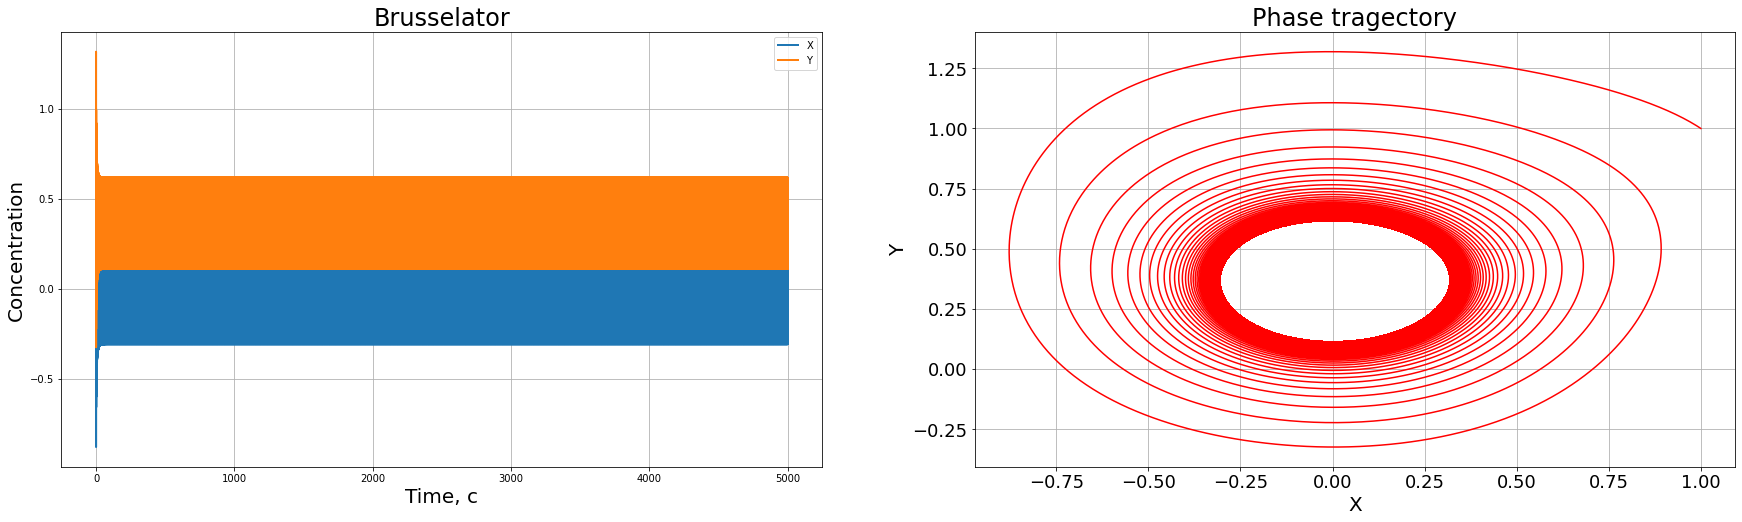

In [31]:
solution = [initial_condition]
t = [0.0]

for i in range(5000000):
    iteration = Runge_Kutta(t[i], solution[i], h, Brusselator)
    solution.append(iteration)
    t.append(h * (i + 1))
    

xs = []
ys = []
for elem in solution:
    xs.append(elem[0][0])
    ys.append(elem[1][0])

draw_result(t, xs, ys)

# Метод Адамса
## A = 1 
## B = 1,8

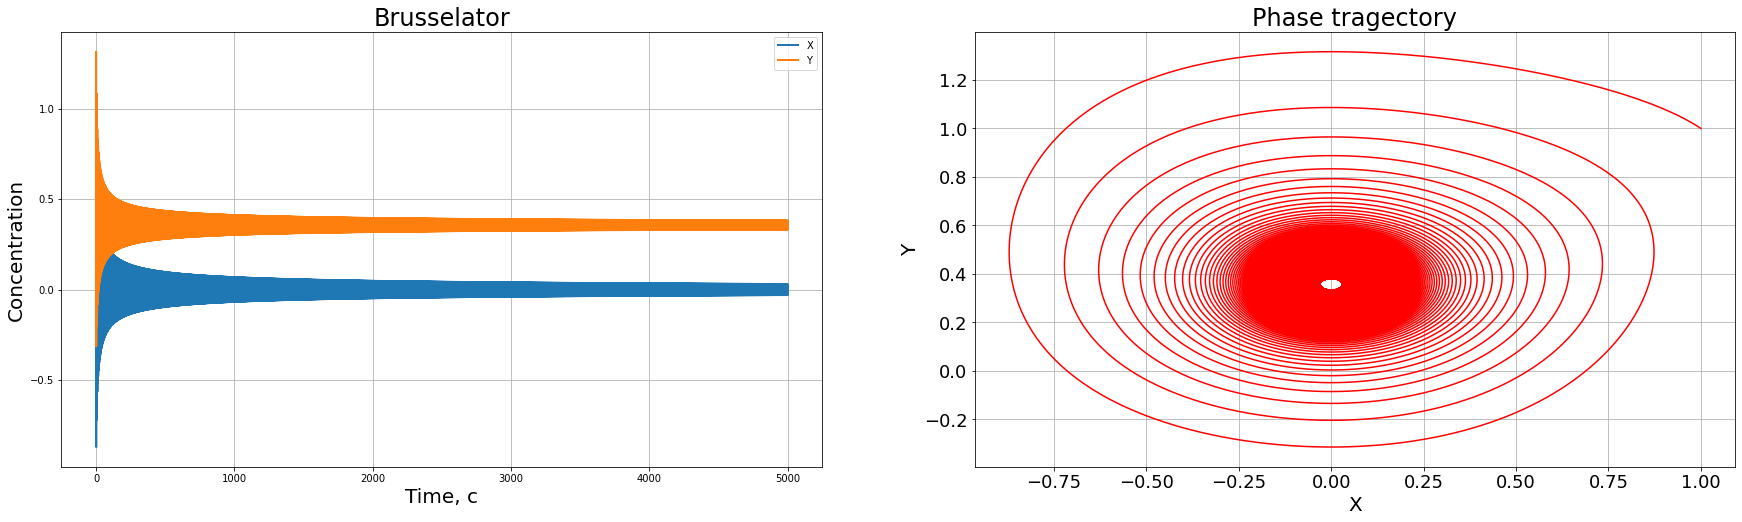

In [32]:
solution = [initial_condition]
t = [0.0]

for i in range(3):
    iteration = Runge_Kutta(t[i], solution[i], h, Brusselator)
    solution.append(iteration)
    t.append(h * (i + 1))
for i in range(3, 5000000):
    x_prev = [t[i - 2], t[i - 1], t[i]]
    y_prev = [solution[i - 2], solution[i - 1], solution[i]]
    iteration = Adamsa(x_prev, y_prev, h, Brusselator)
    solution.append(iteration)
    t.append(h * (i + 1))

xs = []
ys = []
for elem in solution:
    xs.append(elem[0][0])
    ys.append(elem[1][0])

draw_result(t, xs, ys)

# Независимо от метода мы получили предельный цикл